## Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006


#### Objective
Memprediksi seseorang akan melakukan deposit atau tidak pada sebuah Bank dengan menggunakan beberapa model machine learning untuk supervised learning


#### Input variables:
##### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import pustaka yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as pip
from sklearn.metrics import RocCurveDisplay



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Loading

Unduh dataset yang akan digunakan di https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

In [2]:
data = pd.read_csv('./bank-additional/bank-additional/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Cek Ukuran data
data.shape

(41188, 21)

In [5]:
# Statistical Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
# Cek proporsi data target
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Data Cleaning

In [7]:
# Check Persentase data yang hilang

(data.isnull().sum()/len(data))*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Data yang akan kita gunakan telah dibersihkan sebelumnya sehingga tidak ada data yang hilang

In [8]:
# Copy data asli sebagai salinan agar tidak berubah
df = data.copy()

#### Unique Value Categorical Variable

Kita akan melihat data yang unik dari masing-masing features kategorik

In [9]:
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('input unique', i, 'adalah', data[i].unique())
            print('-'*100)

In [10]:
unique_val(df)

input unique job adalah ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------------------------------------------------------------------
input unique marital adalah ['married' 'single' 'divorced' 'unknown']
----------------------------------------------------------------------------------------------------
input unique education adalah ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------------------------------------------------------------------
input unique default adalah ['no' 'unknown' 'yes']
----------------------------------------------------------------------------------------------------
input unique housing adalah ['no' 'yes' 'unknown']
----------------------------------------------------------------------------------------------------
inpu

Kita bisa melakukan features engineering (optional) dari variabel kategorik setelah melakukan features selection 

### Identify Outlier

In [11]:
# Ubah duration dari detik ke menit
df['duration_minutes'] = round(df['duration']/60, 2)

In [12]:
df.drop(['duration'], axis=1, inplace=True)

In [13]:
# membagi dataframe menjadi dua tipe data
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [14]:
df[numeric_cols].columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'duration_minutes'],
      dtype='object')

In [15]:
#from numpy import percentile

def outliers(data):
    cols = data.columns
    for i in cols:
        #print(i)
        # calculate interquartile range
        q25, q75 = percentile(data[i], 25), percentile(data[i], 75)
        iqr = q75 - q25
        print('Percentiles:',i, '25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in data[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        

In [16]:
outliers(df[numeric_cols])

Percentiles: age 25th=32.000, 75th=47.000, IQR=15.000
Identified outliers: 469
Percentiles: campaign 25th=1.000, 75th=3.000, IQR=2.000
Identified outliers: 2406
Percentiles: pdays 25th=999.000, 75th=999.000, IQR=0.000
Identified outliers: 1515
Percentiles: previous 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 5625
Percentiles: emp.var.rate 25th=-1.800, 75th=1.400, IQR=3.200
Identified outliers: 0
Percentiles: cons.price.idx 25th=93.075, 75th=93.994, IQR=0.919
Identified outliers: 0
Percentiles: cons.conf.idx 25th=-42.700, 75th=-36.400, IQR=6.300
Identified outliers: 447
Percentiles: euribor3m 25th=1.344, 75th=4.961, IQR=3.617
Identified outliers: 0
Percentiles: nr.employed 25th=5099.100, 75th=5228.100, IQR=129.000
Identified outliers: 0
Percentiles: duration_minutes 25th=1.700, 75th=5.320, IQR=3.620
Identified outliers: 2955


Dari Keterangan diatas terdapat keterangan jumlah outlier dari berbagai features contohnya age, campaign, pdays, previous, dan duration minutes. Namun kita tidak bisa sembarang untuk menghapus outlier kita perlu menyesuaikan dengan problem yang akan kita lakukan

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


age


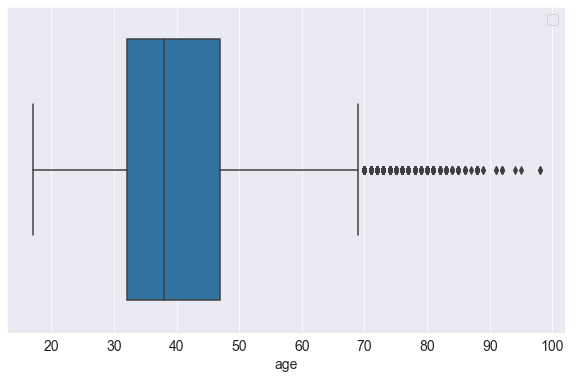

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


campaign


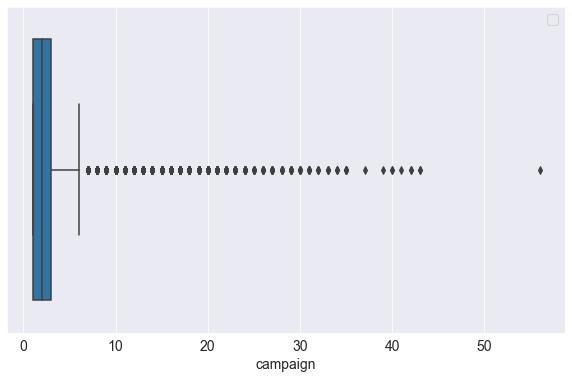

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cons.conf.idx


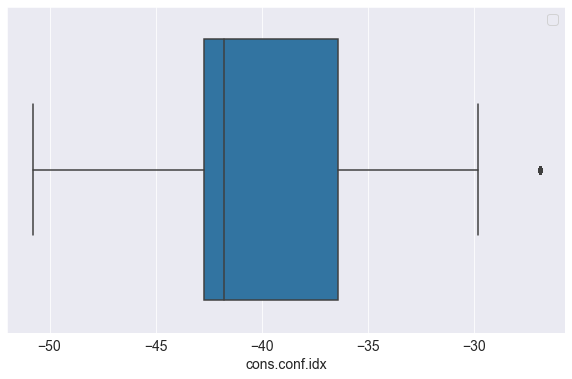

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


duration_minutes


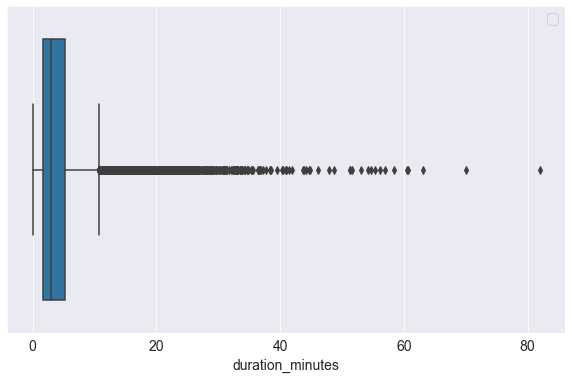

In [17]:
# Kita Pilih variabel yang akan kita analisa outlier 
boxplot_cols = ['age', 'campaign', 'cons.conf.idx', 'duration_minutes']

# Using boxplot to identify outliers
for col in boxplot_cols:
    print(col)
    ax = sns.boxplot(df[col])
    ax.legend()
    plt.show()

In [18]:
# Remove outlier pada feature age
q25, q75 = percentile(df['age'], 25), percentile(df['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outlier_age = df[df['age'] > upper]

Kita batasi usia hanya pada rentang minimum-max dengan melakukan drop outlier pada features age

In [19]:
df.drop(outlier_age.index, inplace=True)

In [20]:
df[df['campaign']>50]['y'].count()

1

Dari Boxplot feature campaign terdapat satu data yang terlalu jauh dari data lain, kita akan hapus data tersebut.

In [21]:
df.drop(df[df['campaign']>50].index, inplace=True)

Kita batasi masalah duration minutes tidak lebih dari 60 minutes

In [22]:
df.drop(df[df['duration_minutes']>60].index, inplace=True)

In [23]:
# Remove outlier pada feature cons_conf_idx
q25, q75 = percentile(df['cons.conf.idx'], 25), percentile(df['cons.conf.idx'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outlier_cons_conf_idx = df[df['cons.conf.idx'] > upper]

Kita juga menghapus outlier pada features cons.conf.idx

In [24]:
df.drop(outlier_cons_conf_idx.index, inplace=True)

In [25]:
# Cek jumlah Outlier
outliers(df[numeric_cols])

Percentiles: age 25th=32.000, 75th=47.000, IQR=15.000
Identified outliers: 0
Percentiles: campaign 25th=1.000, 75th=3.000, IQR=2.000
Identified outliers: 2391
Percentiles: pdays 25th=999.000, 75th=999.000, IQR=0.000
Identified outliers: 1351
Percentiles: previous 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 5268
Percentiles: emp.var.rate 25th=-1.800, 75th=1.400, IQR=3.200
Identified outliers: 0
Percentiles: cons.price.idx 25th=93.075, 75th=93.994, IQR=0.919
Identified outliers: 0
Percentiles: cons.conf.idx 25th=-42.700, 75th=-36.400, IQR=6.300
Identified outliers: 0
Percentiles: euribor3m 25th=1.365, 75th=4.961, IQR=3.596
Identified outliers: 0
Percentiles: nr.employed 25th=5099.100, 75th=5228.100, IQR=129.000
Identified outliers: 0
Percentiles: duration_minutes 25th=1.700, 75th=5.320, IQR=3.620
Identified outliers: 2889


##### Check data removed outlier

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


age


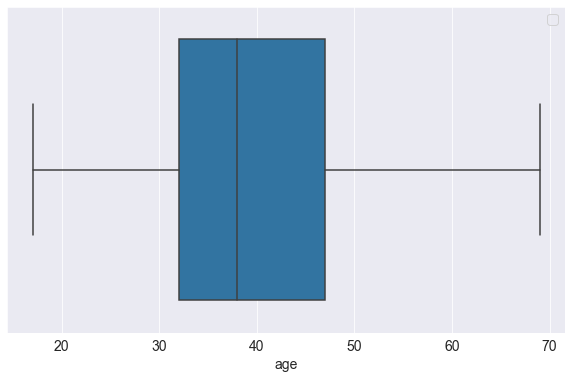

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


campaign


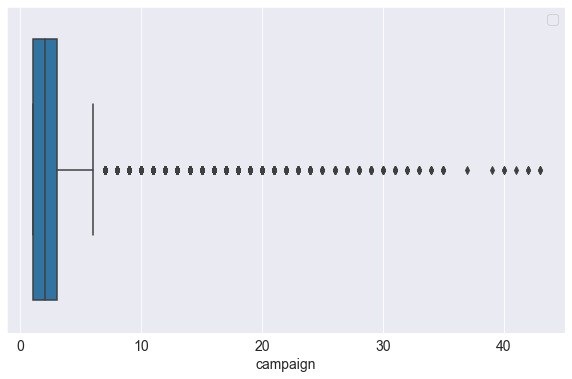

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cons.conf.idx


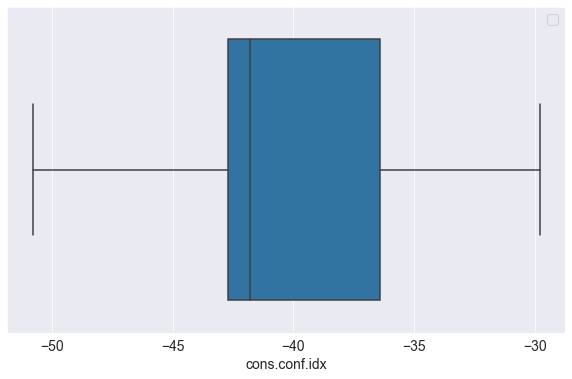

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


duration_minutes


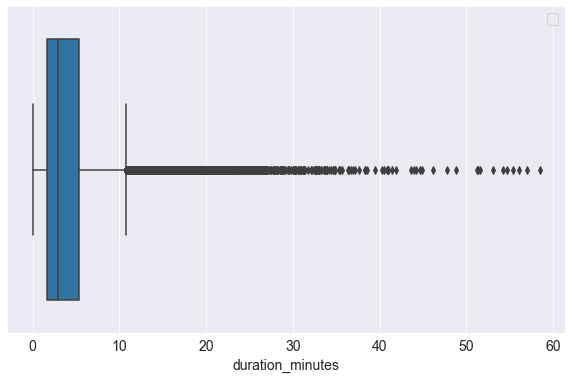

In [26]:
# Using boxplot to identify outliers
for col in boxplot_cols:
    print(col)
    ax = sns.boxplot(df[col])
    ax.legend()
    plt.show()

In [27]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

Feature Engineering dengan merubah input feature month ke kwartal (setiap 3 bulan)

In [28]:
kwartal = []

def label_month(data):
    idx = data.index
    for idx in data:
        q1 = ['jan', 'feb', 'mar']
        q2 = ['apr', 'may', 'jun']
        q3 = ['jul', 'aug', 'sep']
        if idx in q1:
            kwartal.append('q1')
        elif idx in q2:
            kwartal.append('q2')
        elif idx in q3:
            kwartal.append('q3')
        else:
            kwartal.append('q4')



In [29]:
label_month(df['month'])

In [30]:
df['kwartal'] = kwartal

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_minutes,kwartal
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.35,q2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.48,q2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.77,q2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.52,q2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.12,q2


In [32]:
# hapus feature month
df.drop(['month'], axis=1, inplace=True)

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_minutes,kwartal
0,56,housemaid,married,basic.4y,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.35,q2
1,57,services,married,high.school,unknown,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.48,q2
2,37,services,married,high.school,no,yes,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.77,q2
3,40,admin.,married,basic.6y,no,no,no,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.52,q2
4,56,services,married,high.school,no,no,yes,telephone,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.12,q2


### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a
predictive model

##### Mutual Information

Statistics for Feature Selection:

I. Numerical Input, Categorical Output

II. Categorical Input, Categorical Output


In [34]:
# membagi dataframe menjadi dua tipe data
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [37]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df.y)


In [38]:
 # Numerical Input, Categorical Output
df_mi_num = df[numeric_cols].apply(calculate_mi)
df_mi_num = df_mi_num.sort_values(ascending=False).to_frame(name='MI')
print('-'*100)
print('#Mutual Information Numerical Input, Categorical Output#')
print(df_mi_num)
print('-'*100)
 
 #  Categorical Input, Numerical Output
df_mi_cat = df[categorical_cols].apply(calculate_mi)
df_mi_cat = df_mi_cat.sort_values(ascending=False).to_frame(name='MI')
print('#Mutual Information Categorical Input, Categorical Output#')
print(df_mi_cat)
print('-'*100)

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values b

----------------------------------------------------------------------------------------------------
#Mutual Information Numerical Input, Categorical Output#
                        MI
duration_minutes  0.099218
euribor3m         0.071419
cons.price.idx    0.061955
cons.conf.idx     0.061955
nr.employed       0.056159
emp.var.rate      0.049035
pdays             0.029187
previous          0.017577
age               0.008861
campaign          0.002868
----------------------------------------------------------------------------------------------------
#Mutual Information Categorical Input, Categorical Output#
                   MI
y            0.337115
poutcome     0.027721
contact      0.010511
kwartal      0.007524
job          0.006919
default      0.005417
education    0.002698
marital      0.001876
day_of_week  0.000250
housing      0.000077
loan         0.000008
----------------------------------------------------------------------------------------------------


Dari perhitungan Mutual Information score diatas kita hanya menggunakan features yang memiliki nilai MI yang cukup tinggi, selanjutnya feature yang memiliki nilai MI yang rendah kita akan hapus dikarenakan memiliki kemungkina features tersebut kurang memberikan sensitifitas terhadap feature target 

In [39]:
# Df_cleaned adalah data yang features nya telah kita seleksi dengan menggunakan MI
df_cleaned = df[['duration_minutes', 'euribor3m', 'cons.price.idx',
                'cons.conf.idx', 'nr.employed', 'emp.var.rate', 'pdays', 'previous', 'poutcome', 'contact', 'y']]
df_cleaned.head()

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,pdays,previous,poutcome,contact,y
0,4.35,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,no
1,2.48,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,no
2,3.77,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,no
3,2.52,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,no
4,5.12,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,no


## Explorasi Data

<AxesSubplot:xlabel='previous', ylabel='duration_minutes'>

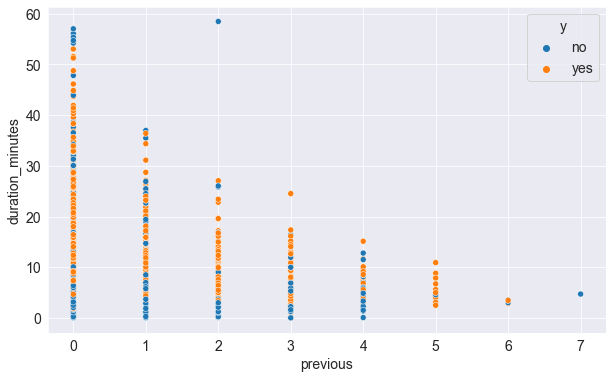

In [40]:
sns.scatterplot(data=df_cleaned, x='previous', y='duration_minutes', hue='y')

Dari Scatterplot diatas dapat disimpulkan bahwa persebaran yang paling banyak adalah pada previous 0 dan semakin banyak durasi semakin memiliki peluang client melakukan deposit

Kita akan melakukan EDA pada client yang melakukan Deposit

In [41]:
df_cleaned_yes = df_cleaned[(df_cleaned['y']=='yes')]
df_cleaned_yes.head()

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,pdays,previous,poutcome,contact,y
75,26.25,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes
83,17.37,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes
88,24.45,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes
129,9.65,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes
139,7.68,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes


In [42]:
df_cleaned_yes['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.649, 92.713,
       93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601,
       94.767])

<AxesSubplot:xlabel='cons.price.idx', ylabel='Count'>

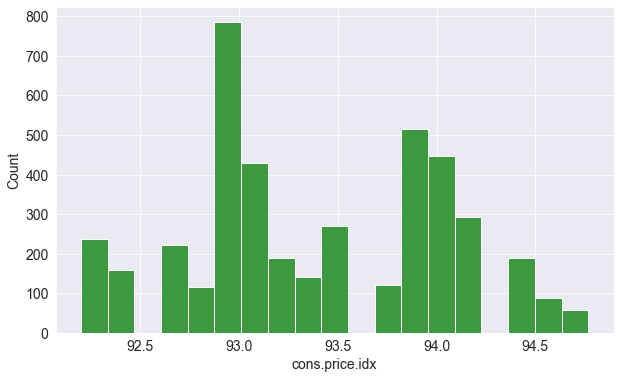

In [43]:
sns.histplot(data=df_cleaned_yes, x='cons.price.idx', color="green")

consumer price index terbesar dengan deposit yes disekitar angka 93

<AxesSubplot:xlabel='cons.conf.idx', ylabel='Count'>

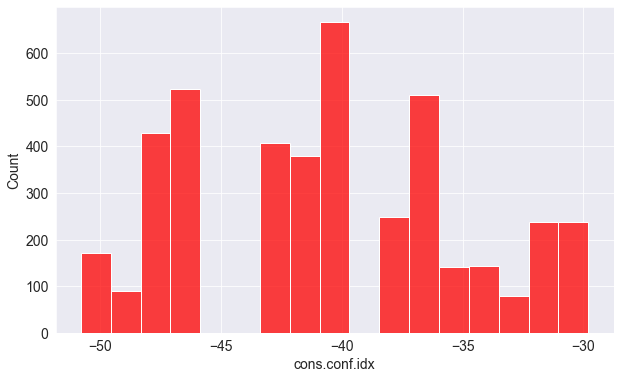

In [44]:
sns.histplot(data=df_cleaned_yes, x='cons.conf.idx', color="red")

consumer confident index terbesar dengan deposit yes disekitar angka -40

<AxesSubplot:xlabel='euribor3m', ylabel='Count'>

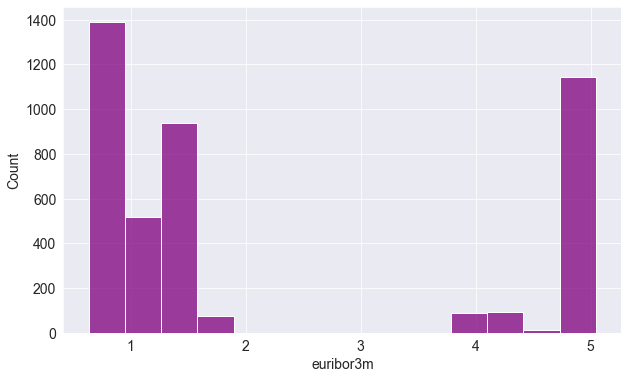

In [45]:
sns.histplot(data=df_cleaned_yes, x='euribor3m', color="purple")

euribor terbesar dengan deposit yes disekitar angka 0-1

<AxesSubplot:xlabel='nr.employed', ylabel='emp.var.rate'>

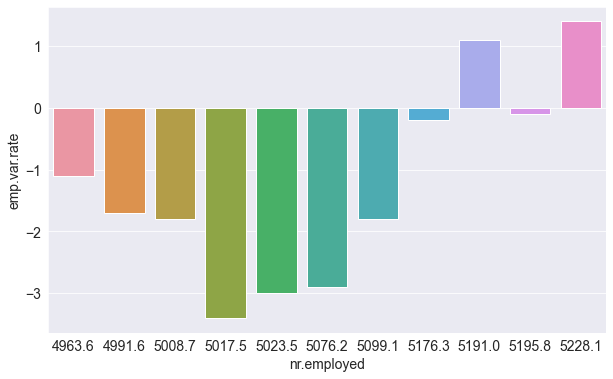

In [46]:
sns.barplot(data=df_cleaned, x='nr.employed', y='emp.var.rate')

Perbandingan employment variation rate dan jumlah employment yang melakukan deposit, employment variation rate negatif lebih banyak jumlah employee yang melakukan deposit

In [47]:
df_poutcome_contact = df_cleaned_yes.groupby(['contact', 'poutcome'])['y'].count().reset_index()
df_poutcome_contact

,contact,poutcome,y
0,cellular,failure,498
1,cellular,nonexistent,2280
2,cellular,success,726
3,telephone,failure,31
4,telephone,nonexistent,663
5,telephone,success,58


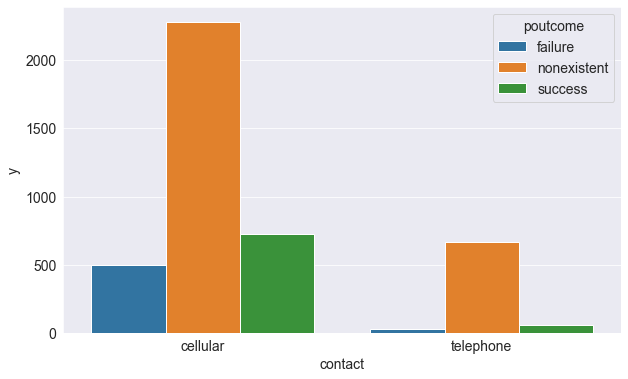

In [48]:
ax = sns.barplot(x='contact', y=df_poutcome_contact['y'], hue='poutcome', data=df_poutcome_contact)

Kita bisa melihat dari pengelompokan berdasarkan contact dan poutcome yang melakukan deposit, dengan poutcome sukses lebih banyak dilakukan degan contact cellular

In [49]:
labels = df_cleaned_yes['pdays'].unique()
labels

array([999,   5,   6,  10,   7,  11,   2,   0,   3,   9,  12,   1,   4,
        13,  14,  15,  16,   8,  21,  18,  22,  25,  26,  17,  27,  19],
      dtype=int64)

Kita melakukan feature engineering dengan merubah data features pdays menjadi pdays_perweek

In [50]:
def pdays_perweek(data):
    pdays_perweek = []
    for i in data.iloc[:]:
        if i <= 7:
            pdays_perweek.append('week1')
        elif i == 999:
            pdays_perweek.append('notpreviouslycontacted')
        elif i > 21:
            pdays_perweek.append('week4')
        elif (i > 7) and (i <= 14):
            pdays_perweek.append('week2')
        else:
            pdays_perweek.append('week3')
    return pdays_perweek

In [51]:
pdays_per_week = pdays_perweek(df_cleaned_yes['pdays'])

In [53]:
df_cleaned_yes['pdays_perweek'] = pdays_per_week

C:\Users\sivis\AppData\Local\Temp/ipykernel_32320/2656241480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_yes['pdays_perweek'] = pdays_per_week


In [54]:
df_cleaned_yes.head()

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,pdays,previous,poutcome,contact,y,pdays_perweek
75,26.25,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes,notpreviouslycontacted
83,17.37,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes,notpreviouslycontacted
88,24.45,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes,notpreviouslycontacted
129,9.65,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes,notpreviouslycontacted
139,7.68,4.857,93.994,-36.4,5191.0,1.1,999,0,nonexistent,telephone,yes,notpreviouslycontacted


In [55]:
labels = df_cleaned_yes['pdays_perweek'].unique()
labels

array(['notpreviouslycontacted', 'week1', 'week2', 'week3', 'week4'],
      dtype=object)

In [56]:
pdays_per_week_count = df_cleaned_yes['pdays_perweek'].value_counts()

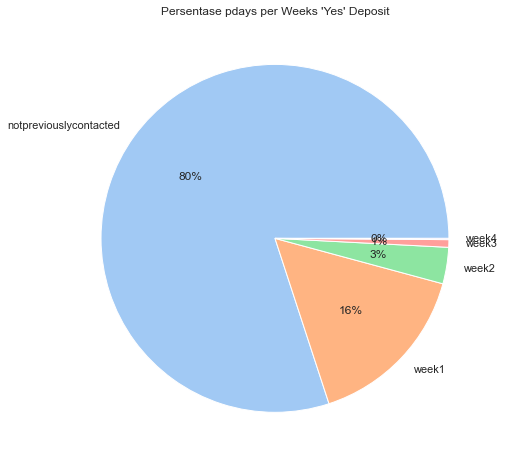

In [57]:
colors = sns.color_palette('pastel')[0:5]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(pdays_per_week_count, labels= labels, colors=colors, autopct='%.0f%%')
plt.title("Persentase pdays per Weeks 'Yes' Deposit")
plt.show()

Dari pie chat tersebut 80% orang yang melakukan deposit tidak dikontak sebelumnya

In [58]:
df_cleaned_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 75 to 41186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4256 non-null   float64
 1   euribor3m         4256 non-null   float64
 2   cons.price.idx    4256 non-null   float64
 3   cons.conf.idx     4256 non-null   float64
 4   nr.employed       4256 non-null   float64
 5   emp.var.rate      4256 non-null   float64
 6   pdays             4256 non-null   int64  
 7   previous          4256 non-null   int64  
 8   poutcome          4256 non-null   object 
 9   contact           4256 non-null   object 
 10  y                 4256 non-null   object 
 11  pdays_perweek     4256 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 432.2+ KB


In [59]:
df_cleaned['pdays_perweek'] = pdays_perweek(df_cleaned['pdays'])

C:\Users\sivis\AppData\Local\Temp/ipykernel_32320/2141761433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pdays_perweek'] = pdays_perweek(df_cleaned['pdays'])


In [60]:
df_cleaned.drop(['pdays'], axis=1, inplace=True)

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
df_cleaned.head()

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,previous,poutcome,contact,y,pdays_perweek
0,4.35,4.857,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,no,notpreviouslycontacted
1,2.48,4.857,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,no,notpreviouslycontacted
2,3.77,4.857,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,no,notpreviouslycontacted
3,2.52,4.857,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,no,notpreviouslycontacted
4,5.12,4.857,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,no,notpreviouslycontacted


In [62]:
df_cleaned['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

## Data Preprocessing

In [63]:
label_encode = LabelEncoder()
df_cleaned['y'] = label_encode.fit_transform(df_cleaned['y'])

C:\Users\sivis\AppData\Local\Temp/ipykernel_32320/1817447344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['y'] = label_encode.fit_transform(df_cleaned['y'])


Bagi features dan target, variabel target adalah kolom 'y' yaitu deposit yes dan no

In [64]:
X = df_cleaned.drop(['y'], axis=1)
y = df_cleaned['y']

Split Data Train dan Data Test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Buat Pipeline untuk masing-masing data types

In [66]:
numerical_pipeline = Pipeline([
                               ("scaler", MinMaxScaler())
                               

                               ])

categorical_pipeline = Pipeline([
                                 ("onehot", OneHotEncoder())
                               
                                 ])

In [67]:
# membagi dataframe menjadi dua tipe data

numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_cleaned.select_dtypes('object').columns.tolist()
numeric_cols

['duration_minutes',
 'euribor3m',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'emp.var.rate',
 'previous',
 'y']

In [68]:
num_cols = df_cleaned[numeric_cols].drop(['y'], axis=1)
num_cols.columns

Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')

In [69]:
categorical_cols

['poutcome', 'contact', 'pdays_perweek']

In [73]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer([
                                  ("numeric", numerical_pipeline, num_cols.columns),
                                  ("categoric", categorical_pipeline, categorical_cols)
                      

])

## Machine Learning Model

1. Kita akan membuat beberapa Machine Learning Model seperti, Logistic Regression, SVM, Decision Tree, Random Forest, Naive Bayes, KNN, dan Stochastic Gradient Boosting

2. Kita akan menggunakan model dengan hyperparameter default sebagai baseline model, dan kita akan menggunakan RandomOverSampler sebagai cara untuk menangani data imbalanced karena RandomOverSampler cukup bagus untuk menangani data imbalanced dengan ukuran data yang tidak terlalu banyak

3. Repeated stratified k-flod cross-validation adalah sebuah cara untuk meningkatkan estimasi performa machine learning model dengan melakukan pengambilan sample secara acak di setiap pengulangan dengan mempertahankan proporsi data
4. Evaluasi Model kita akan menggunakan metric recall yang berfokus pada seseorang/calon nasabah yang akan melakukan deposit dengan alasan bahwa bank akan dirugikan jika calon nasabah potential diprediksi tidak melakukan deposit padahal nasabah sangat potential melakukan deposit


### Pendefinisian Model

**Logistic Regression**

In [74]:
# Model logistic Regression
clf = LogisticRegression()


pipeline_clf = pip([
                      ("prep_clf", preprocessor),
                    ('random', RandomOverSampler(random_state=42)),
                      ("algo_clf", clf)
])

### Pelatihan Model

In [76]:
pipeline_clf.fit(X_train, y_train)

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('prep_clf',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_clf', LogisticRegression())])

### Evaluasi Model

In [77]:
pipeline_clf.score(X_test, y_test)

0.8576565406075636

In [78]:
y_pred = pipeline_clf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7214
           1       0.41      0.85      0.56       851

    accuracy                           0.86      8065
   macro avg       0.70      0.85      0.74      8065
weighted avg       0.92      0.86      0.88      8065



Recall untuk variabel target 'y'=1 adalah 85% dan variabel target 'y'=0 adalah 86%. kedua metrics tidak memiliki perbedaan yang cukup signifikan

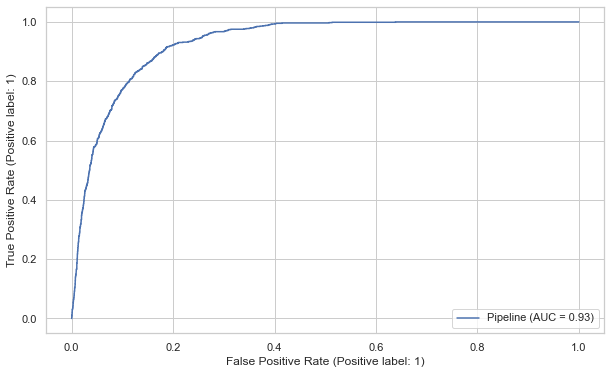

In [81]:
RocCurveDisplay.from_estimator(pipeline_clf, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 93% 

#### Hyperparameter Tuning

"For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes."

Sehingga kita akan gunakan hyperparameter ['sag', 'saga', 'liblinear'] untuk kasus binary problem dan data yang relatif kecil

In [82]:
parameter_clf = {
    "algo_clf__penalty":  ['l1', 'l2'],
    "algo_clf__C": [100, 10, 1.0, 0.1, 0.01],
    "algo_clf__solver": ['sag', 'saga', 'liblinear']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_clf = GridSearchCV(pipeline_clf, param_grid= parameter_clf, cv = cv, n_jobs=-1, verbose=1)

In [83]:
model_clf.fit(X_train, y_train)

Fitting 25 folds for each of 30 candidates, totalling 750 fits


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\s

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_clf',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                      

In [84]:
# summarize results
print("Best: %f using %s" % (model_clf.best_score_, model_clf.best_params_))
means = model_clf.cv_results_['mean_test_score']
stds = model_clf.cv_results_['std_test_score']
params = model_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858457 using {'algo_clf__C': 100, 'algo_clf__penalty': 'l2', 'algo_clf__solver': 'sag'}
nan (nan) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'sag'}
0.858451 (0.004154) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'saga'}
0.858414 (0.004124) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'liblinear'}
0.858457 (0.004162) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l2', 'algo_clf__solver': 'sag'}
0.858414 (0.004146) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l2', 'algo_clf__solver': 'saga'}
0.858432 (0.004138) with: {'algo_clf__C': 100, 'algo_clf__penalty': 'l2', 'algo_clf__solver': 'liblinear'}
nan (nan) with: {'algo_clf__C': 10, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'sag'}
0.858445 (0.004111) with: {'algo_clf__C': 10, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'saga'}
0.858451 (0.004163) with: {'algo_clf__C': 10, 'algo_clf__penalty': 'l1', 'algo_clf__solver': 'liblinear

Model dengan best hyperparameter

In [85]:
model_clf.best_params_

{'algo_clf__C': 100, 'algo_clf__penalty': 'l2', 'algo_clf__solver': 'sag'}

In [86]:
y_pred = model_clf.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7214
           1       0.41      0.85      0.56       851

    accuracy                           0.86      8065
   macro avg       0.70      0.85      0.74      8065
weighted avg       0.92      0.86      0.88      8065



Hasil model dengan best paramater dan baseline model untuk metric recall hasilnya sama yaitu:

Recall untuk variabel target 'y'=1 adalah 85% dan variabel target 'y'=0 adalah 86%. kedua metrics tidak memiliki perbedaan yang cukup signifikan

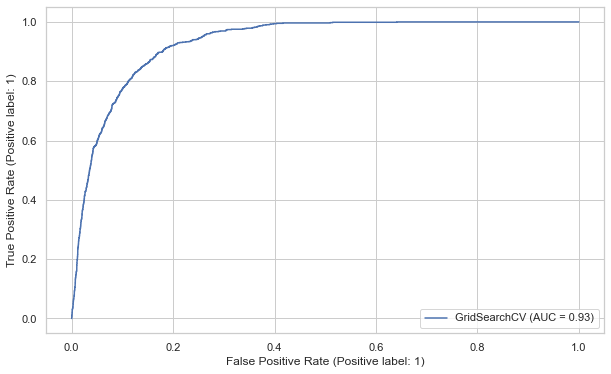

In [88]:
RocCurveDisplay.from_estimator(model_clf, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 93% 

### Pendefinisian Model

**SVM**

In [89]:
svm = SVC()
pipeline_svm = pip([
                      ("prep_svm", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_svm", svm)
                      ])

### Pelatihan Model

In [90]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('prep_svm',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_svm', SVC())])

### Evaluasi Model

In [91]:
pipeline_svm.score(X_test, y_test)

0.8534407935523869

In [92]:
y_pred = pipeline_svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7214
           1       0.41      0.90      0.56       851

    accuracy                           0.85      8065
   macro avg       0.70      0.87      0.74      8065
weighted avg       0.93      0.85      0.88      8065



Recall untuk variabel target 'y'=1 adalah 90% dan variabel target 'y'=0 adalah 85%. kedua metrics memiliki perbedaan namun tidak terlalu jauh

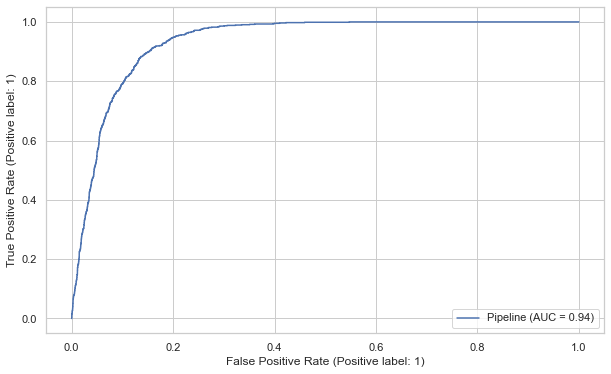

In [93]:
RocCurveDisplay.from_estimator(pipeline_svm, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 94% 

#### Hyperparameter Tuning

Untuk Hyperparameter model svm yang akan kita gunakan adalah hyperparameter yang paling sering digunakan untuk classification

In [94]:
parameter_svm = {
    "algo_svm__kernel":  ['poly', 'rbf'],
    "algo_svm__C": [0.1, 0.01],
    "algo_svm__gamma": ['scale']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_svm = GridSearchCV(pipeline_svm, param_grid= parameter_svm, cv = cv, n_jobs=-1, verbose=1)

In [95]:
model_svm.fit(X_train, y_train)

Fitting 25 folds for each of 4 candidates, totalling 100 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_svm',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                      

In [96]:
# summarize results
print("Best: %f using %s" % (model_svm.best_score_, model_svm.best_params_))
means = model_svm.cv_results_['mean_test_score']
stds = model_svm.cv_results_['std_test_score']
params = model_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860237 using {'algo_svm__C': 0.1, 'algo_svm__gamma': 'scale', 'algo_svm__kernel': 'rbf'}
0.857081 (0.004002) with: {'algo_svm__C': 0.1, 'algo_svm__gamma': 'scale', 'algo_svm__kernel': 'poly'}
0.860237 (0.004589) with: {'algo_svm__C': 0.1, 'algo_svm__gamma': 'scale', 'algo_svm__kernel': 'rbf'}
0.778956 (0.008015) with: {'algo_svm__C': 0.01, 'algo_svm__gamma': 'scale', 'algo_svm__kernel': 'poly'}
0.772650 (0.005030) with: {'algo_svm__C': 0.01, 'algo_svm__gamma': 'scale', 'algo_svm__kernel': 'rbf'}


In [97]:
y_pred_svm = model_svm.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7214
           1       0.42      0.86      0.57       851

    accuracy                           0.86      8065
   macro avg       0.70      0.86      0.74      8065
weighted avg       0.92      0.86      0.88      8065



Hasil model dengan best paramater yaitu:
Recall untuk variabel target 'y'=1 adalah 86% dan variabel target 'y'=0 adalah 86%, kedua metrics sama.

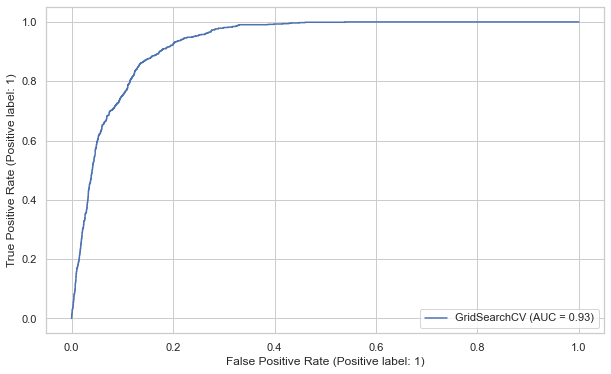

In [99]:
RocCurveDisplay.from_estimator(model_svm, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 93% 

### Pendefinisian Model

**Decision Tree**

In [104]:
tree = DecisionTreeClassifier()
pipeline_tree = pip([
                      ("prep_tree", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_tree", tree)
                      ])


### Pelatihan Model

In [105]:
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('prep_tree',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_tree', DecisionTreeClassifier())])

In [106]:
pipeline_tree.score(X_test, y_test)

0.8964662120272784

In [107]:
y_pred = pipeline_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7214
           1       0.51      0.50      0.50       851

    accuracy                           0.90      8065
   macro avg       0.73      0.72      0.72      8065
weighted avg       0.90      0.90      0.90      8065



Recall untuk variabel target 'y'=1 adalah 50% dan variabel target 'y'=0 adalah 94%, dengan menggunakan baseline model hasil metric recall cukup tidak seimbang.

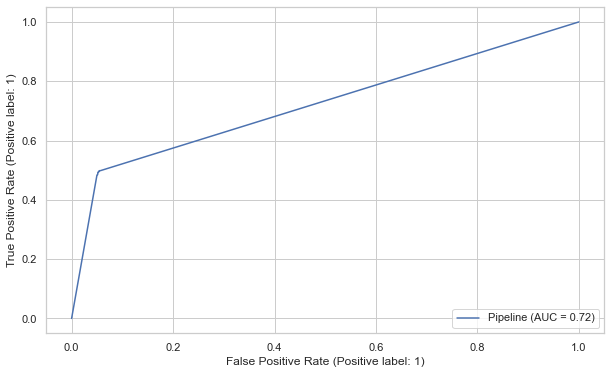

In [108]:
RocCurveDisplay.from_estimator(pipeline_tree, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 72% 

#### Hyperparameter Tuning

Kita menggunakan criterion gini dan entropy sebagai fungsi untuk mengukur kualitas split, kedalaman maximum pohon antar range 1-10 untuk menghindari overfit, min sample split jumlah sample yang diperlukan untuk split range (1, 10), dan min sample leaf range(1, 5) yaitu digunakan sebagai jumalah minimum sample yang diperlukan sebagai leaf node

In [109]:
parameter_tree = {
    "algo_tree__criterion":  ['gini', 'entropy'],
    "algo_tree__max_depth": range(1, 10),
    "algo_tree__min_samples_split": range(1, 10),
    "algo_tree__min_samples_leaf": range(1, 5) 
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_tree = GridSearchCV(pipeline_tree, param_grid= parameter_tree, cv = cv, n_jobs=-1, verbose=1)

In [110]:
model_tree.fit(X_train, y_train)

Fitting 25 folds for each of 648 candidates, totalling 16200 fits


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\sivis\AppData\Local\Programs\Python\Python38\l

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_tree',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pip...nehot',
                                                                                          OneHotEncoder())]),
                                                                  

In [115]:
# summarize results
print("Best: %f using %s" % (model_tree.best_score_, model_tree.best_params_))
means = model_tree.cv_results_['mean_test_score']
stds = model_tree.cv_results_['std_test_score']
params = model_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855314 using {'algo_tree__criterion': 'entropy', 'algo_tree__max_depth': 3, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 2}
nan (nan) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 1}
0.674634 (0.036493) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 2}
0.674634 (0.036493) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 3}
0.674634 (0.036493) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 4}
0.674634 (0.036493) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth': 1, 'algo_tree__min_samples_leaf': 1, 'algo_tree__min_samples_split': 5}
0.674634 (0.036493) with: {'algo_tree__criterion': 'gini', 'algo_tree__max_depth':

In [116]:
y_pred = model_tree.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7214
           1       0.40      0.83      0.54       851

    accuracy                           0.85      8065
   macro avg       0.69      0.84      0.73      8065
weighted avg       0.92      0.85      0.87      8065



Hasil model dengan best paramater yaitu:

Recall untuk variabel target 'y'=1 adalah 83% dan variabel target 'y'=0 adalah 85%, keduaa metrics ini tidak berbeda secara signifikan atau cukup seimbang sehingga dari hasil tuning memberikan performance yang lebih baik 

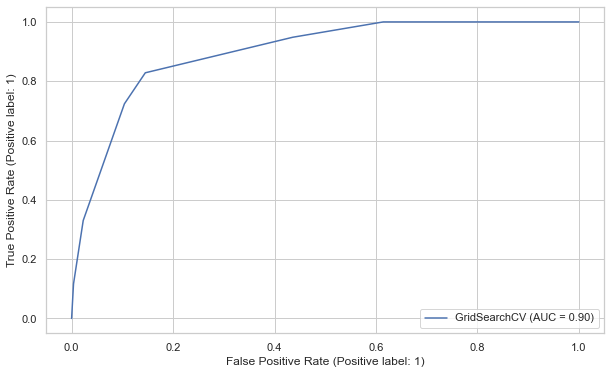

In [118]:
RocCurveDisplay.from_estimator(model_tree, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 90% 

### Pendefinisian Model

**Random Forest**

In [119]:
rf = RandomForestClassifier()

pipeline_rf = pip([
                      ("prep_rf", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_rf", rf)
                ])

### Pelatihan Model

In [120]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('prep_rf',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_rf', RandomForestClassifier())])

### Evaluasi Model

In [121]:
pipeline_rf.score(X_test, y_test)

0.8990700557966522

In [122]:
y_pred = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7214
           1       0.52      0.58      0.55       851

    accuracy                           0.90      8065
   macro avg       0.73      0.76      0.74      8065
weighted avg       0.90      0.90      0.90      8065



Recall untuk variabel target 'y'=1 adalah 58% dan variabel target 'y'=0 adalah 94%, dengan menggunakan baseline model hasil metric recall cukup tidak seimbang.

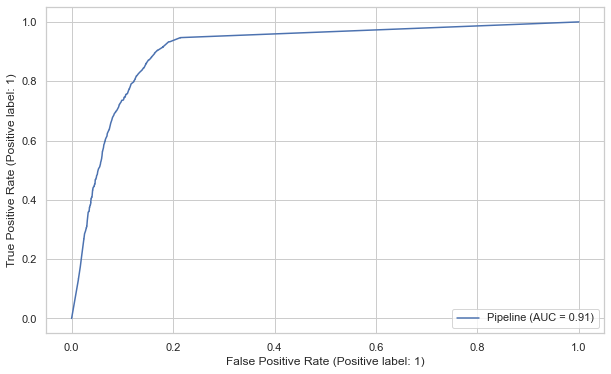

In [123]:
RocCurveDisplay.from_estimator(pipeline_rf, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 91% 

#### Hyperparameter Tuning


Kita pilih n_estimators atau jumlah pohon 10, 100, dan 1000 untuk mengetahui model terbaik dan menggunakan max_features (jumlah features yang diperhatikan ketika melakuka split) sqrt dan log2 akan mengambil square root dari total banyaknya features dalam setiap run, begitu juga dengan log2 akan mengambil log2 dari total banyaknya features dalam setiap run

In [124]:
parameter_rf = {
    "algo_rf__n_estimators":  [10, 100, 1000],
    "algo_rf__max_features": ['sqrt', 'log2']
}

In [125]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_rf = GridSearchCV(pipeline_rf, param_grid= parameter_rf, cv = cv, n_jobs=-1, verbose=1)
model_rf.fit(X_train, y_train)

Fitting 25 folds for each of 6 candidates, totalling 150 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_rf',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                       

In [126]:
# summarize results
print("Best: %f using %s" % (model_rf.best_score_, model_rf.best_params_))
means = model_rf.cv_results_['mean_test_score']
stds = model_rf.cv_results_['std_test_score']
params = model_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898332 using {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 100}
0.897204 (0.003589) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 10}
0.898332 (0.002805) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 100}
0.898208 (0.002995) with: {'algo_rf__max_features': 'sqrt', 'algo_rf__n_estimators': 1000}
0.897514 (0.002679) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 10}
0.898183 (0.002845) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 100}
0.898134 (0.002910) with: {'algo_rf__max_features': 'log2', 'algo_rf__n_estimators': 1000}


In [127]:
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7214
           1       0.52      0.57      0.54       851

    accuracy                           0.90      8065
   macro avg       0.73      0.75      0.74      8065
weighted avg       0.90      0.90      0.90      8065



Hasil Hyperparameter Tuning masih memiliki perbedaan yang signifikan yaitu:

Recall untuk variabel target 'y'=1 adalah 57% dan variabel target 'y'=0 adalah 94%, dengan menggunakan baseline model hasil metric recall cukup tidak seimbang.

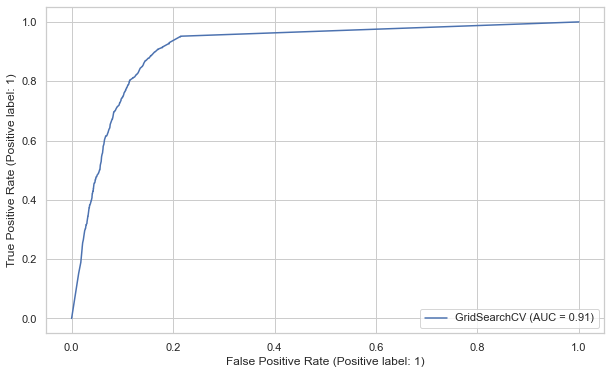

In [128]:
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 91% 

### Pendefinisian Model

**KNN**

In [129]:
#from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

pipeline_knn = pip([
                      ("prep_knn", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_knn", knn)
                      ])


### Pelatihan Model

In [130]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('prep_knn',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_knn', KNeighborsClassifier())])

### Evaluasi Model

In [131]:
pipeline_knn.score(X_test, y_test)

0.8719156850588965

In [132]:
y_pred = pipeline_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7214
           1       0.44      0.80      0.57       851

    accuracy                           0.87      8065
   macro avg       0.71      0.84      0.75      8065
weighted avg       0.92      0.87      0.89      8065




Recall untuk variabel target 'y'=1 adalah 80% dan variabel target 'y'=0 adalah 88%, keduaa metrics ini tidak berbeda secara signifikan atau cukup seimbang sehingga dari hasil tuning memberikan performance yang lebih baik 

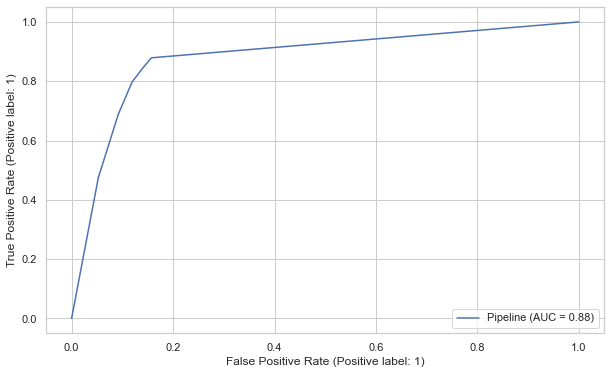

In [133]:
RocCurveDisplay.from_estimator(pipeline_knn, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 88% 

#### Hyperparameter Tuning

Kita memilih n_neighbors dari range(1, 21) untuk semua bilangan ganjil sebagai hyperparameter tetangga terdekat selain itu kita menguji metric ukuran jarak seperti euclidean, manhattan, dan minkowski.
Weight fungsi yang kita gunakan untuk prediksi adalah uniform artinya semua titik atau data disetiap tetangga mempunyai bobot yang sama sedangkan distance tetangga yang paling dekat memiliki bobot yang lebih besar dibanding tetangga yang jauh

In [192]:
parameter_knn = {
    "algo_knn__n_neighbors":  range(1, 11, 2),
    "algo_knn__weights": ['uniform', 'distance'],
    "algo_knn__metric": ['euclidean', 'minkowski']
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_knn = GridSearchCV(pipeline_knn, param_grid= parameter_knn, cv = cv, n_jobs=-1, verbose=1)

In [193]:
model_knn.fit(X_train, y_train)

Fitting 25 folds for each of 20 candidates, totalling 500 fits


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_knn',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                      

In [195]:
# summarize results
print("Best: %f using %s" % (model_knn.best_score_, model_knn.best_params_))
means = model_knn.cv_results_['mean_test_score']
stds = model_knn.cv_results_['std_test_score']
params = model_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 1, 'algo_knn__weights': 'uniform'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 1, 'algo_knn__weights': 'uniform'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 1, 'algo_knn__weights': 'distance'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 3, 'algo_knn__weights': 'uniform'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 3, 'algo_knn__weights': 'distance'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 5, 'algo_knn__weights': 'uniform'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 5, 'algo_knn__weights': 'distance'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 7, 'algo_knn__weights': 'uniform'}
nan (nan) with: {'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 7, 'algo_knn__weights': 'distance'}
nan (n

In [201]:
print(model_knn.best_score_)
print(model_knn.best_params_)

nan
{'algo_knn__metric': 'euclidean', 'algo_knn__n_neighbors': 1, 'algo_knn__weights': 'uniform'}


In [197]:
y_pred = model_knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7214
           1       0.51      0.49      0.50       851

    accuracy                           0.90      8065
   macro avg       0.72      0.72      0.72      8065
weighted avg       0.89      0.90      0.90      8065



Recall untuk variabel target 'y'=1 adalah 49% dan variabel target 'y'=0 adalah 94%, setelah dilakukan hyperparameter metric recall menjadi berbeda secara signifikan hal ini juga diperkuat dengan hasil best score *nan* dan hasil best paramater yang kurang dapat dipercaya sehingga untuk kasus knn kita akan menggunakan baseline model sebagai model untuk memprediksi data test yang baru 

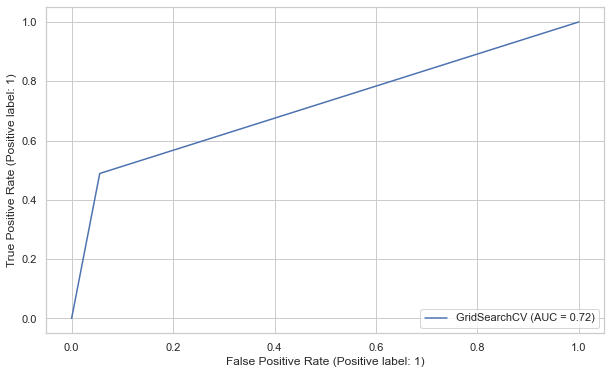

In [198]:
RocCurveDisplay.from_estimator(model_knn, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 72% 

### Pendefinisian Model

**Naive Bayes**

In [141]:
nb = GaussianNB()


pipeline_nb = pip([
                      ("prep_nb", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_nb", nb)
                      ])

### Pelatihan Model

In [142]:
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('prep_nb',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_nb', GaussianNB())])

### Evaluasi Model

In [143]:
pipeline_nb.score(X_train, y_train)

0.8948722718253969

In [144]:
y_pred = pipeline_nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7214
           1       0.51      0.34      0.41       851

    accuracy                           0.90      8065
   macro avg       0.72      0.65      0.68      8065
weighted avg       0.88      0.90      0.89      8065



Recall untuk variabel target 'y'=1 adalah 34% dan variabel target 'y'=0 adalah 96%, dengan menggunakan baseline model hasil metric recall cukup tidak seimbang.

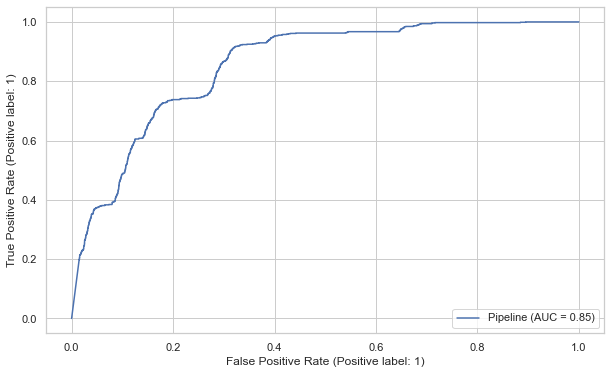

In [145]:
RocCurveDisplay.from_estimator(pipeline_nb, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 85% 

#### Hyperparameter Tuning

Referensi Hyperparameter Tuning Naive Bayes bisa dilihat di https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/ 

In [149]:
parameter_nb = {'algo_nb__var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

In [150]:
model_nb = GridSearchCV(pipeline_nb, param_grid= parameter_nb, cv = cv, n_jobs=-1, verbose=1)

In [151]:
model_nb.fit(X_train, y_train)

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_nb',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipel...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.

In [152]:
# summarize results
print("Best: %f using %s" % (model_nb.best_score_, model_nb.best_params_))
means = model_nb.cv_results_['mean_test_score']
stds = model_nb.cv_results_['std_test_score']
params = model_nb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.895567 using {'algo_nb__var_smoothing': 1e-09}
0.841009 (0.003513) with: {'algo_nb__var_smoothing': 1.0}
0.840749 (0.003581) with: {'algo_nb__var_smoothing': 0.8111308307896871}
0.840458 (0.003584) with: {'algo_nb__var_smoothing': 0.657933224657568}
0.840284 (0.003556) with: {'algo_nb__var_smoothing': 0.533669923120631}
0.840427 (0.003498) with: {'algo_nb__var_smoothing': 0.43287612810830584}
0.841896 (0.004080) with: {'algo_nb__var_smoothing': 0.3511191734215131}
0.843595 (0.003459) with: {'algo_nb__var_smoothing': 0.2848035868435802}
0.843638 (0.003522) with: {'algo_nb__var_smoothing': 0.23101297000831597}
0.843452 (0.003622) with: {'algo_nb__var_smoothing': 0.1873817422860384}
0.843533 (0.003476) with: {'algo_nb__var_smoothing': 0.15199110829529336}
0.843676 (0.003397) with: {'algo_nb__var_smoothing': 0.12328467394420659}
0.843868 (0.003392) with: {'algo_nb__var_smoothing': 0.1}
0.843824 (0.003568) with: {'algo_nb__var_smoothing': 0.08111308307896872}
0.843862 (0.003704) wit

In [153]:
y_pred = model_svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7214
           1       0.42      0.86      0.57       851

    accuracy                           0.86      8065
   macro avg       0.70      0.86      0.74      8065
weighted avg       0.92      0.86      0.88      8065



Hasil Hyperparameter Tuning yaitu:

Recall untuk variabel target 'y'=1 adalah 86% dan variabel target 'y'=0 adalah 86% kedua metric seimbang dan hasil hyperparamter tuning untuk metric recall cukup meningkat secara signifikan.

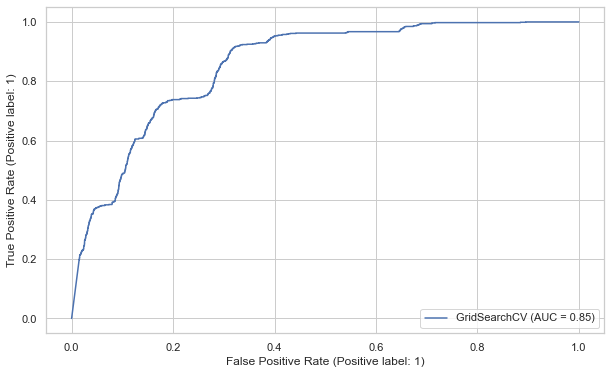

In [154]:
RocCurveDisplay.from_estimator(model_nb, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 85% 

### Pendefinisian Model

**Stochastic Gradient Boosting**

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

sgb = GradientBoostingClassifier()

pipeline_sgb = pip([
                      ("prep_sgb", preprocessor),
                      ('random', RandomOverSampler(random_state=42)),
                      ("algo_sgb", sgb)
                      ])

### Pelatihan Model

In [161]:
pipeline_sgb.fit(X_train, y_train)

Pipeline(steps=[('prep_sgb',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['poutcome', 'contact',
                                                   'pdays_perweek'])])),
                ('random', RandomOverSampler(random_state=42)),
                ('algo_sgb', GradientBoostingClassifier())])

### Evaluasi Model

In [165]:
pipeline_sgb.score(X_train, y_train)

0.8533916170634921

In [166]:
y_pred = pipeline_sgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7214
           1       0.40      0.93      0.56       851

    accuracy                           0.85      8065
   macro avg       0.70      0.89      0.74      8065
weighted avg       0.93      0.85      0.87      8065



Recall untuk variabel target 'y'=1 adalah 93% dan variabel target 'y'=0 adalah 84%, Recall untuk 'y'=1 memiliki nilai yang lebih bagus meskipun tidak signifikan

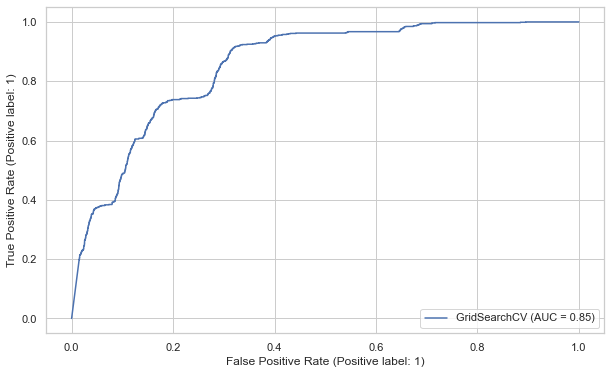

In [167]:
RocCurveDisplay.from_estimator(model_nb, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 85% 

#### Hyperparameter Tuning

Kita pilih jumlah pohon (n_estimators) 100 dan 200, learning rate digunakan untuk mengontrol bobot pohon baru yang ditambahkan ke model, kedalaman pohon maximum 10 dan memilih subsample kurang dari 1 sebagai parameter SGB juga untuk mengurangi varians dan meningkatkan bias

In [174]:
parameter_sgb = {
    "algo_sgb__n_estimators":  [100, 200],
    "algo_sgb__learning_rate": [0.001, 0.01],
    "algo_sgb__subsample": [0.5, 0.7],
    "algo_sgb__max_depth": [10]
}

In [175]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model_sgb = GridSearchCV(pipeline_sgb, param_grid= parameter_sgb, cv = cv, n_jobs=-1, verbose=1)

In [176]:
model_sgb.fit(X_train, y_train)

Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('prep_sgb',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['duration_minutes', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'previous'],
      dtype='object')),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                      

In [177]:
# summarize results
print("Best: %f using %s" % (model_sgb.best_score_, model_sgb.best_params_))
means = model_sgb.cv_results_['mean_test_score']
stds = model_sgb.cv_results_['std_test_score']
params = model_sgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.877313 using {'algo_sgb__learning_rate': 0.01, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 200, 'algo_sgb__subsample': 0.7}
0.867045 (0.004591) with: {'algo_sgb__learning_rate': 0.001, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 100, 'algo_sgb__subsample': 0.5}
0.866295 (0.004639) with: {'algo_sgb__learning_rate': 0.001, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 100, 'algo_sgb__subsample': 0.7}
0.867181 (0.004366) with: {'algo_sgb__learning_rate': 0.001, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 200, 'algo_sgb__subsample': 0.5}
0.866902 (0.004656) with: {'algo_sgb__learning_rate': 0.001, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 200, 'algo_sgb__subsample': 0.7}
0.872315 (0.003867) with: {'algo_sgb__learning_rate': 0.01, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 100, 'algo_sgb__subsample': 0.5}
0.871931 (0.004037) with: {'algo_sgb__learning_rate': 0.01, 'algo_sgb__max_depth': 10, 'algo_sgb__n_estimators': 100, 'algo_s

In [178]:
y_pred = model_sgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7214
           1       0.45      0.86      0.59       851

    accuracy                           0.87      8065
   macro avg       0.72      0.87      0.76      8065
weighted avg       0.93      0.87      0.89      8065



Hasil Hyperparameter Tuning membuat metric recal dari dua nilai traget label menjadi seimbang dengan rincian sebagai berikut:

Recall untuk variabel target 'y'=1 adalah 86% dan variabel target 'y'=0 adalah 88%

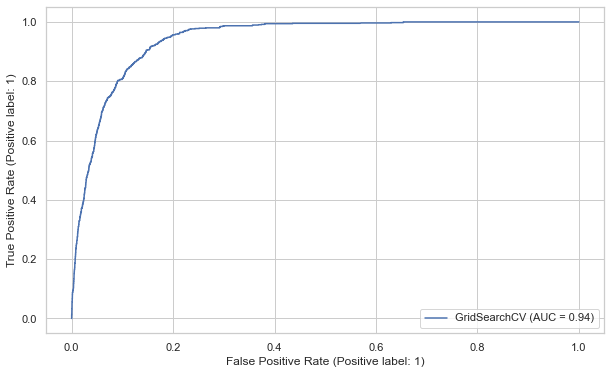

In [179]:
RocCurveDisplay.from_estimator(model_sgb, X_test, y_test)

Dari ROC-AUC Curve dapat disimpulkan bahwa peluang model bisa memprediksi kelas positif dan negatif secara benar adalah 94% 

## Model Inference

In [180]:
# Check data train sebaga role model untuk prediksi data baru
X_train.iloc[0:1]

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,previous,poutcome,contact,pdays_perweek
4204,1.45,4.858,93.994,-36.4,5191.0,1.1,0,nonexistent,telephone,notpreviouslycontacted


In [182]:
data = [
        [5, 4.2, 93.9, -36, 5193.0, 1.1, 0, 'nonexistent', 'telephone', 'week1'],
        [60, 3.0, 92.0, -40, 5193.0, 1.0, 3, 'nonexistent', 'cellular', 'week4']

      ]
X_pred = pd.DataFrame(data, index=[1, 2], columns=X.columns)
X_pred

,duration_minutes,euribor3m,cons.price.idx,cons.conf.idx,nr.employed,emp.var.rate,previous,poutcome,contact,pdays_perweek
1,5,4.2,93.9,-36,5193.0,1.1,0,nonexistent,telephone,week1
2,60,3.0,92.0,-40,5193.0,1.0,3,nonexistent,cellular,week4


In [199]:
# Prediksi Model
print("prediksi data model logistic regression", model_clf.predict(X_pred))
print("-"*100)
print("prediksi data model svm", model_svm.predict(X_pred))
print("-"*100)
print("prediksi data model decision tree", model_tree.predict(X_pred))
print("-"*100)
print("prediksi data model random forest", model_rf.predict(X_pred))
print("-"*100)
print("prediksi data model KNN", pipeline_knn.predict(X_pred))
print("-"*100)
print("prediksi data model Naive Bayes", model_nb.predict(X_pred))
print("-"*100)
print("prediksi data model Stochastic Gradient Boosting", model_sgb.predict(X_pred))


prediksi data model logistic regression [0 1]
----------------------------------------------------------------------------------------------------
prediksi data model svm [0 1]
----------------------------------------------------------------------------------------------------
prediksi data model decision tree [0 1]
----------------------------------------------------------------------------------------------------
prediksi data model random forest [0 0]
----------------------------------------------------------------------------------------------------
prediksi data model KNN [0 1]
----------------------------------------------------------------------------------------------------
prediksi data model Naive Bayes [1 1]
----------------------------------------------------------------------------------------------------
prediksi data model Stochastic Gradient Boosting [0 0]


Model logistic regression, svm, decision tree, dan KNN memprediksi kedua data dengan [0, 1] artinya salah satu akan melakukan deposit, sedangkan untuk random forest dan SGB [0, 0] artinya keduanya tidak akan melakukan deposit, dan Naive Bayes [1, 1] artinya keduanya akan melakukan deposit

## Pengambilan Kesimpulan

In [211]:
d = {'baseline_0': [0.86, 0.85, 0.94, 0.94, 0.88, 0.96, 0.84], 'baseline_1': [0.85, 0.90, 0.50, 0.58, 0.80, 0.34, 0.93], 'hyper_0': [0.86, 0.86, 0.85, 0.94, 0.94, 0.86, 0.88], 'hyper_1':[0.85, 0.86, 0.83, 0.57, 0.49, 0.86, 0.86]}

recall_results = pd.DataFrame(data=d, index=['logistic regression', 'support vector machine', 'decision tree', 'random forest', 'k-nearest neighbors', 'naive bayes', 'stochastics gradient bosting'])
print('----------------------------Metric Recall All Model-----------------------------')
recall_results

----------------------------Metric Recall All Model-----------------------------


,baseline_0,baseline_1,hyper_0,hyper_1
logistic regression,0.86,0.85,0.86,0.85
support vector machine,0.85,0.90,0.86,0.86
decision tree,0.94,0.50,0.85,0.83
random forest,0.94,0.58,0.94,0.57
k-nearest neighbors,0.88,0.80,0.94,0.49
naive bayes,0.96,0.34,0.86,0.86
stochastics gradient bosting,0.84,0.93,0.88,0.86


### Results

Berdasarkan beberapa model Machine Learning yang telah kita buat untuk data bank yang kita gunakan dengan tujuan memprediksi seseorang/calon nasabah yang potential untuk melakukan deposit dengan melihat metric recall dapat disimpulkan bahwa model machine learning yang cukup bagus untuk digunakan adalah logistic regression dan svm (baseline model atau hyperparameter model), sedangkan untuk decision tree dan naive bayes cukup bagus digunakan hanya untuk hyperparameter model, untuk model random forest tidak cukup bagus untuk memprediksi dengan data yang kita gunakan. Model Stochastics Gradient Boosting untuk baseline model mengalami overfitting kemudian hasil hyperparamter tuning membuat model lebih baik.